# Predicting Diabetes

## Problem Statement

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict based on diagnostic measures whether or not a patient has diabetes.

## Dictionary

**Pregnancies.** Number of pregnancies of the patient (numeric) <br>
**Glucose.** Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric) <br>
**BloodPressure.** Diastolic blood pressure (measured in mm Hg) (numeric) <br>
**SkinThickness.** Triceps skinfold thickness (measured in mm) (numeric) <br>
**Insulin.** 2-hour serum insulin (measured in mu U/ml) (numeric) <br>
**BMI.** Body mass index (numeric) <br>
**DiabetesPedigreeFunction.** Diabetes Pedigree Function (numeric) <br>
**Age.** Age of patient (numeric) <br>
**Outcome.** Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [2]:
# Library Importings

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

In [3]:
# EDA

raw_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

raw_df.to_csv("../data/raw/raw_df.csv")

raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
raw_df.duplicated().sum()

0

In [7]:
raw_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

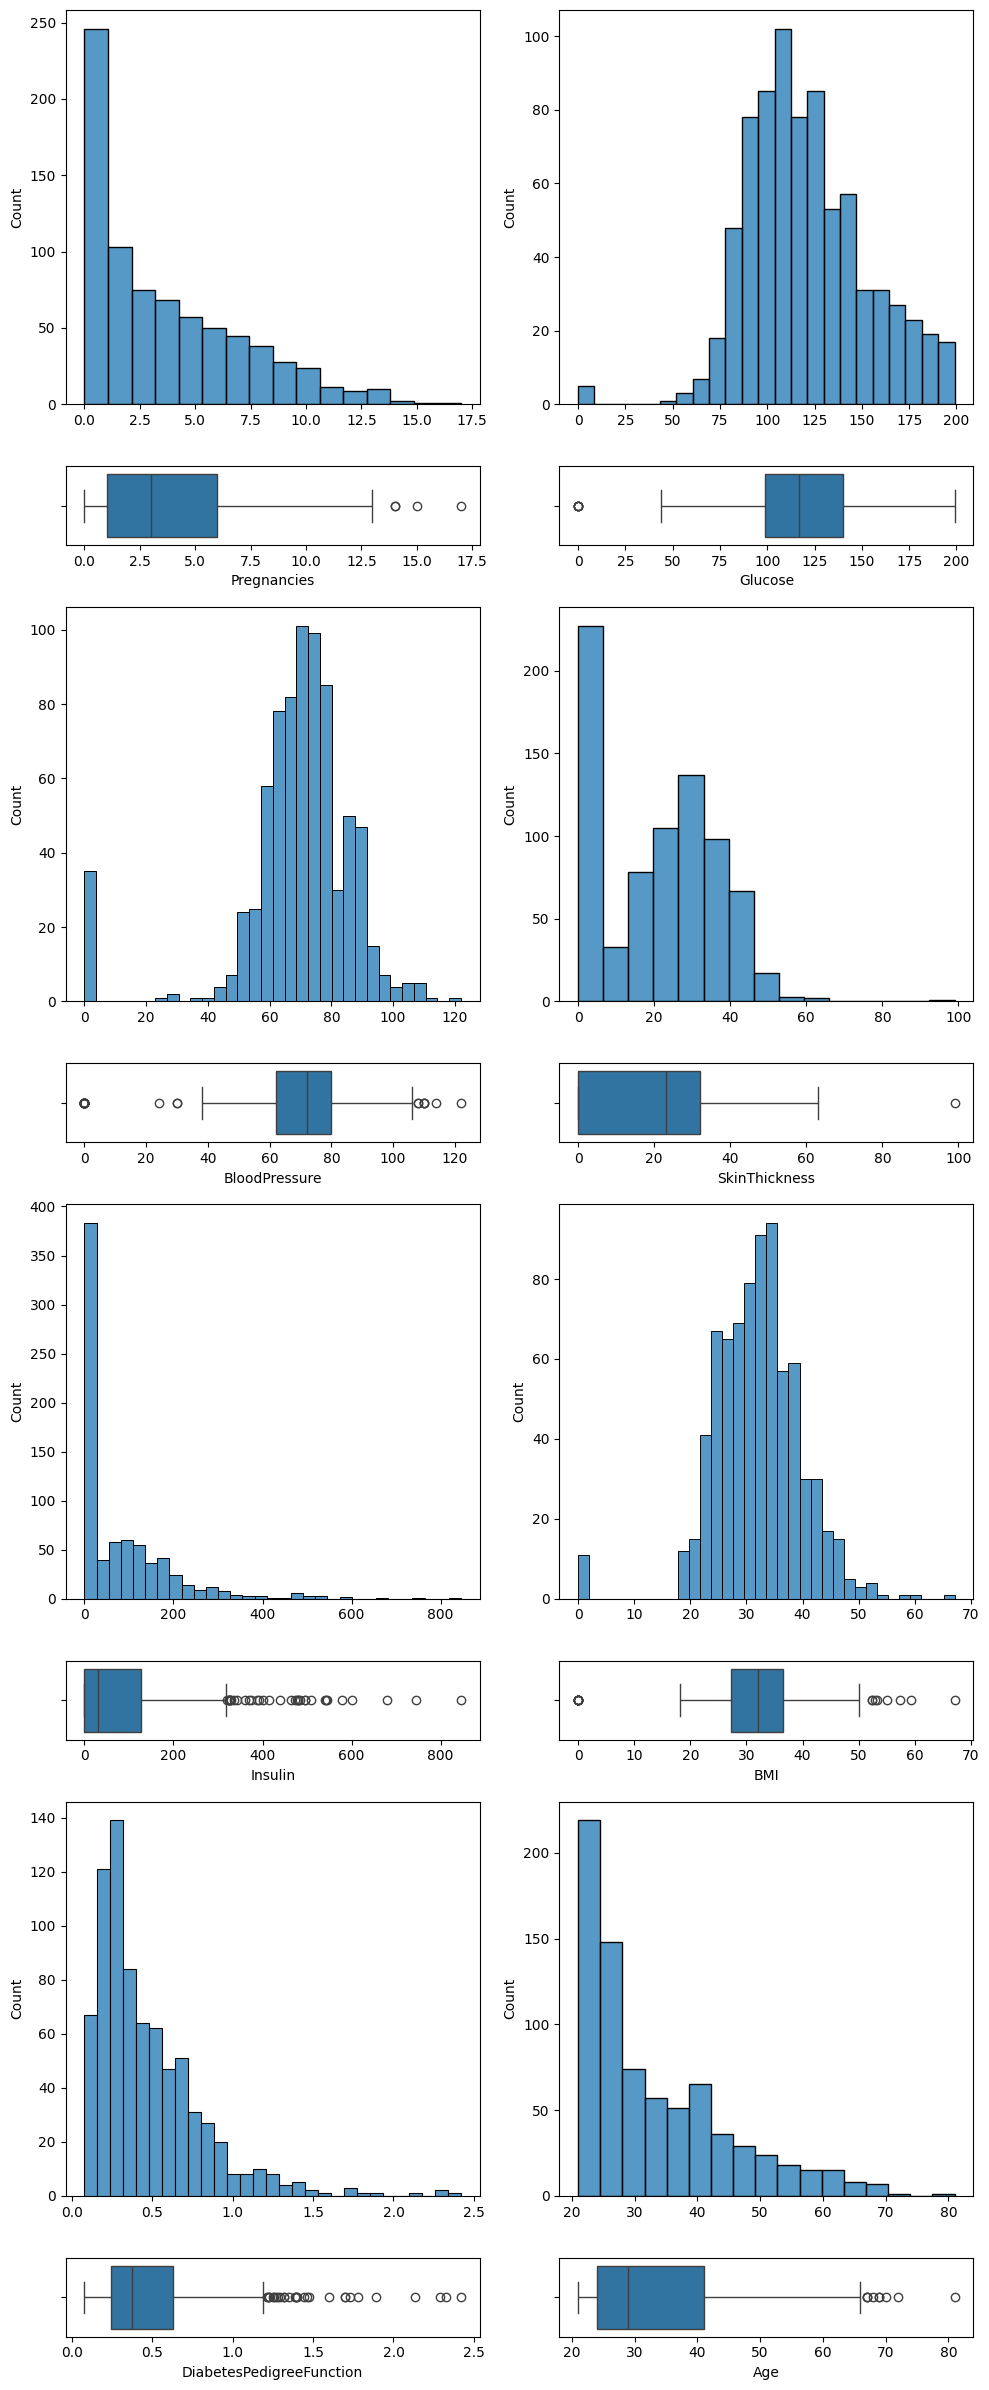

In [8]:
# Analysis on numeric variables

fig, axis = plt.subplots(8, 2, figsize = (10, 24), gridspec_kw={'height_ratios': [5, 1, 5, 1, 5, 1, 5, 1]})

sns.histplot(ax = axis[0, 0], data = raw_df, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = raw_df, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = raw_df, x = "Glucose").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = raw_df, x = "Glucose")
sns.histplot(ax = axis[2, 0], data = raw_df, x = "BloodPressure").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = raw_df, x = "BloodPressure")
sns.histplot(ax = axis[2, 1], data = raw_df, x = "SkinThickness").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = raw_df, x = "SkinThickness")
sns.histplot(ax = axis[4, 0], data = raw_df, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = raw_df, x = "Insulin")
sns.histplot(ax = axis[4, 1], data = raw_df, x = "BMI").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = raw_df, x = "BMI")
sns.histplot(ax = axis[6, 0], data = raw_df, x = "DiabetesPedigreeFunction").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = raw_df, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[6, 1], data = raw_df, x = "Age").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = raw_df, x = "Age")

plt.tight_layout()

plt.show()

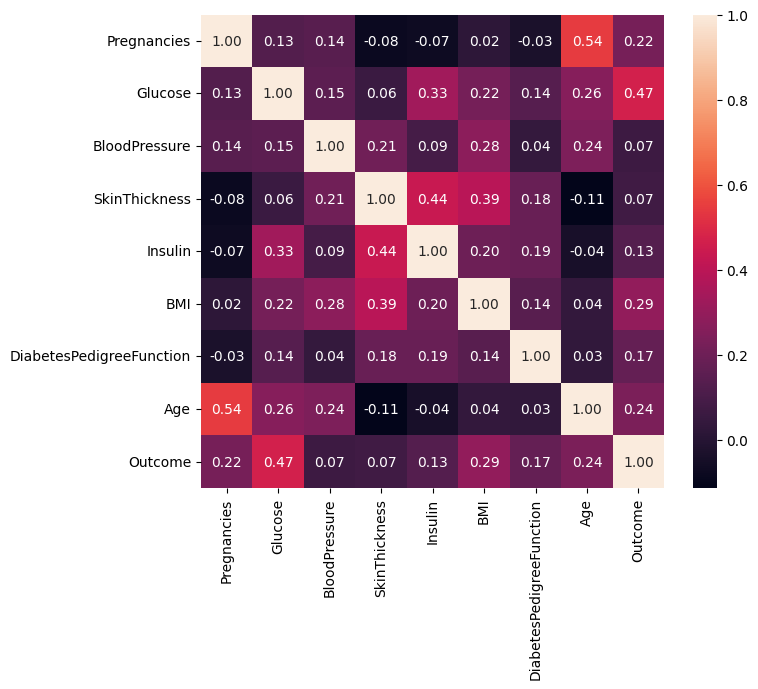

In [9]:
# Correlation analysis   Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age

fig, axis = plt.subplots(figsize = (8, 7))

sns.heatmap(raw_df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [10]:
# The primary correlation exists between 'Age' and 'Pregnancies', which is understandable because a higher age
# is associated with a greater likelihood of experiencing more pregnancies to a point.

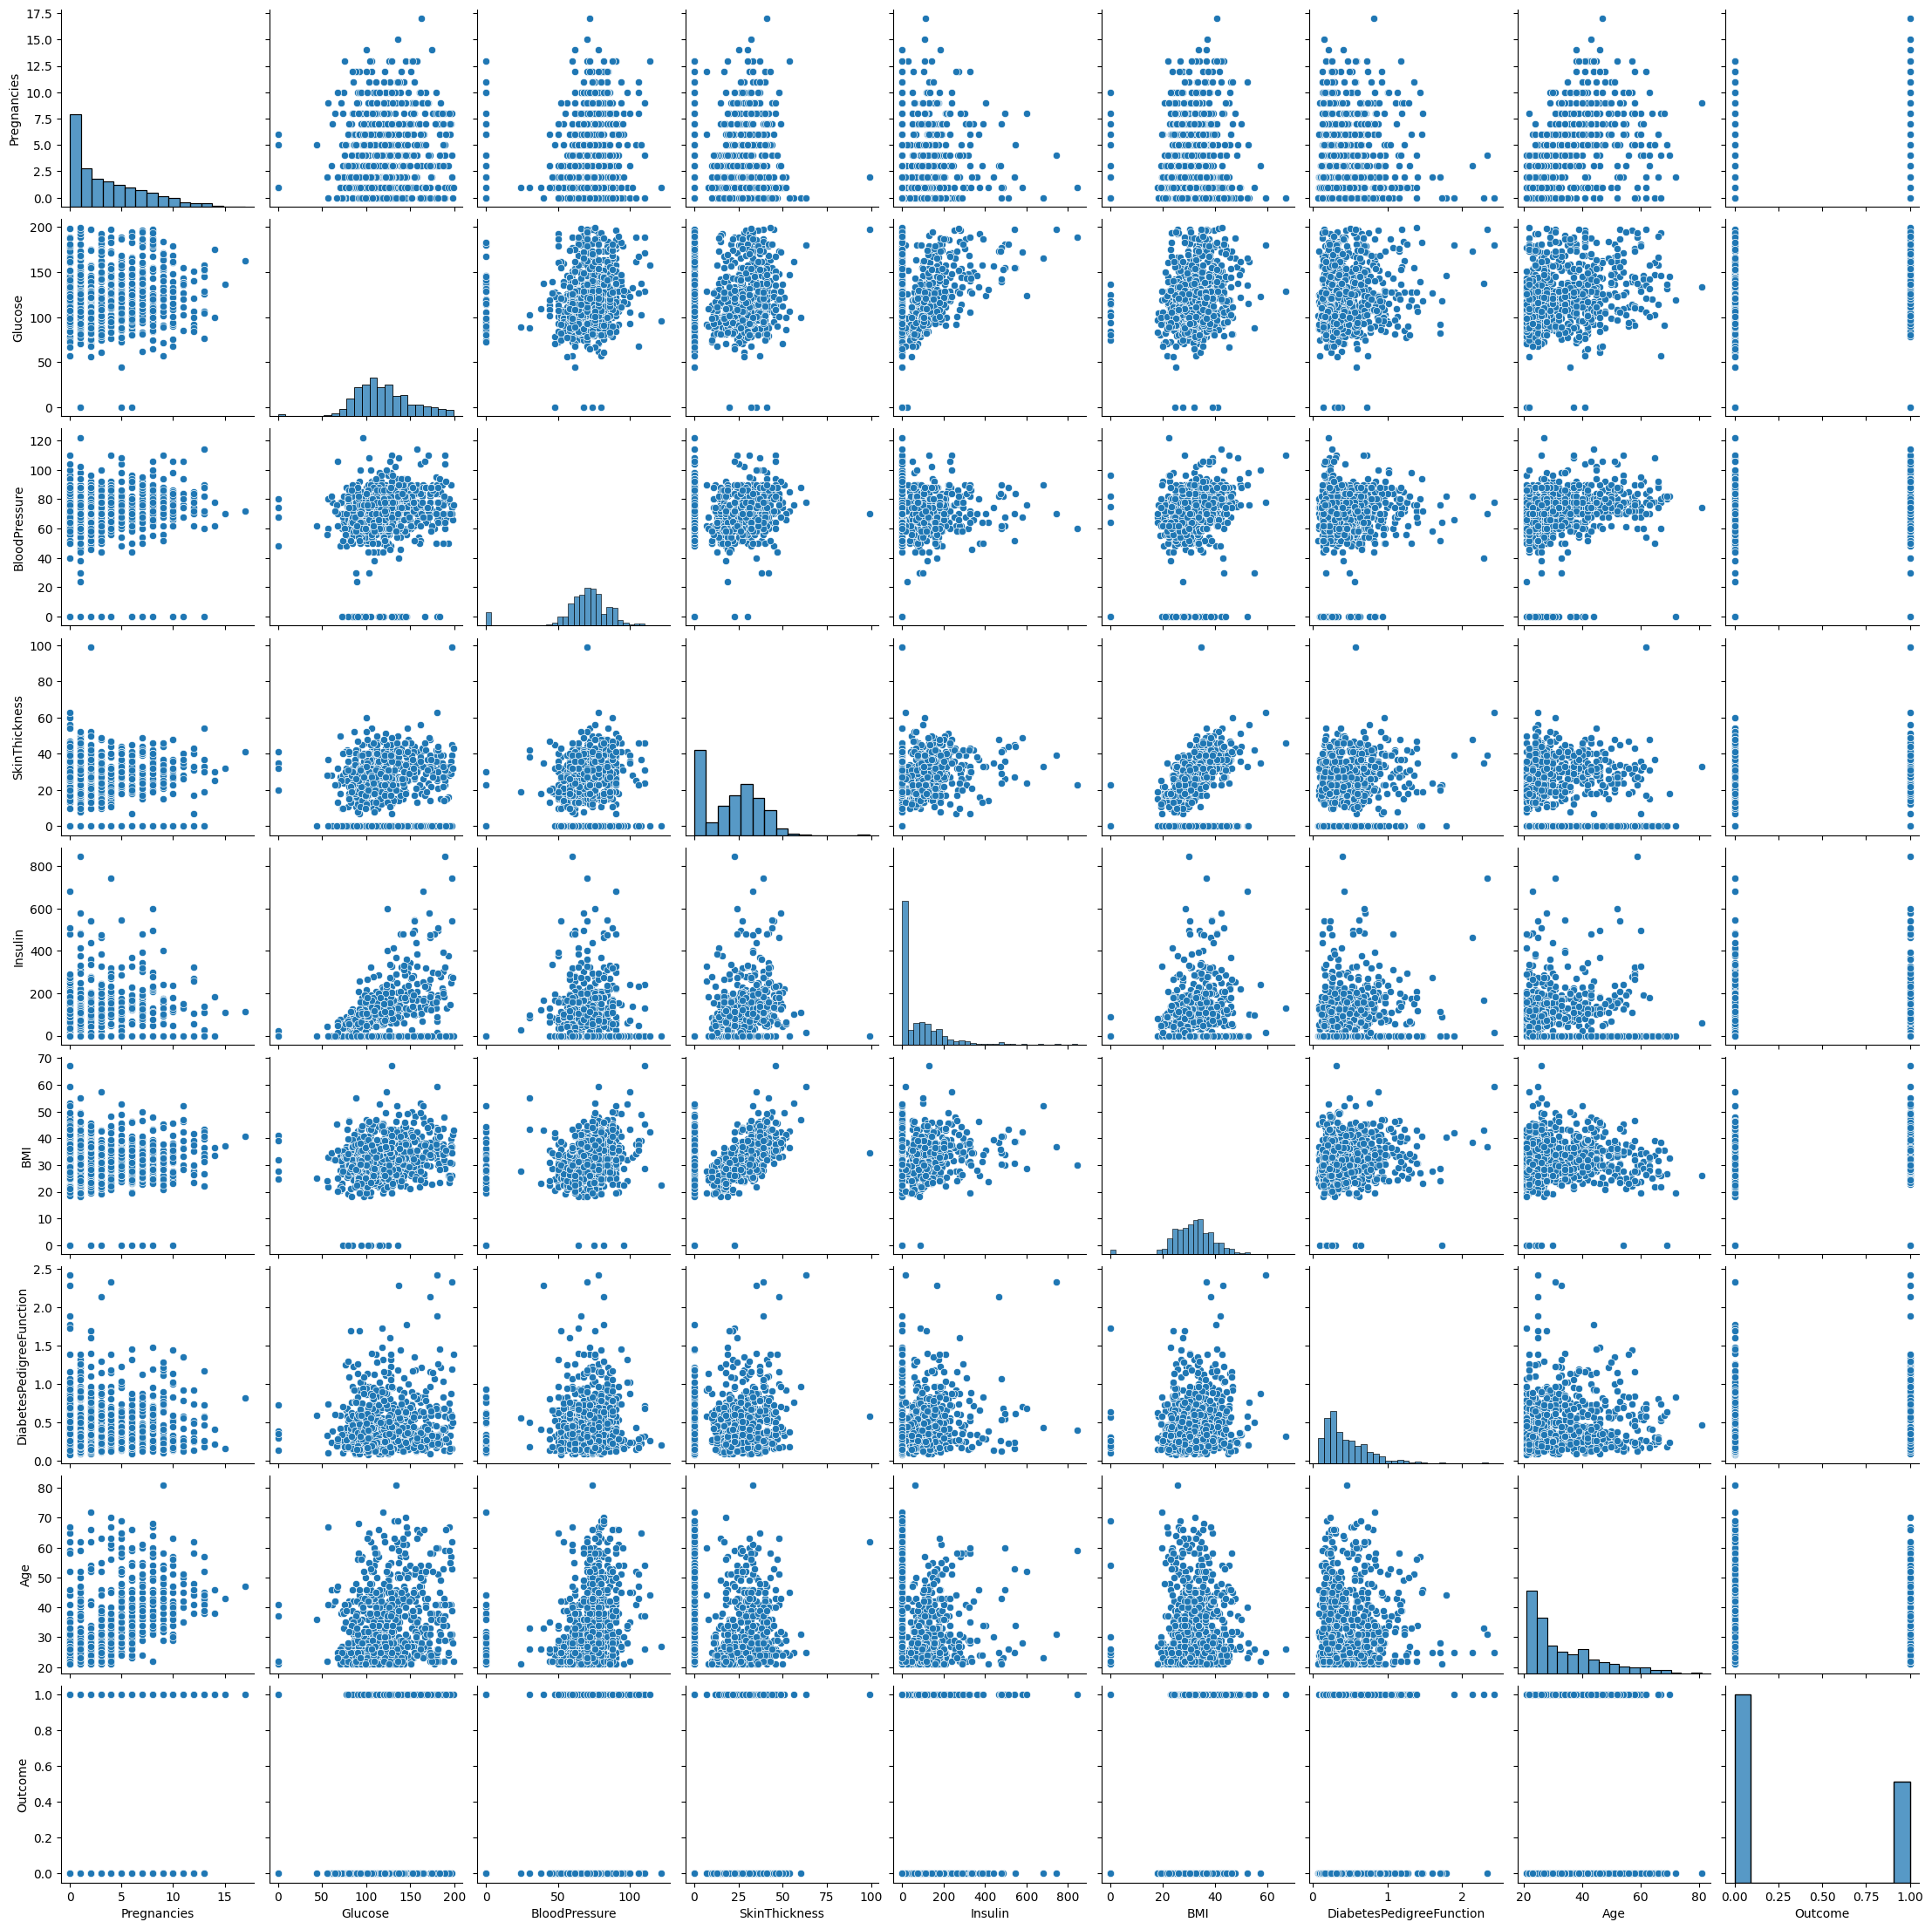

In [11]:
sns.pairplot(data = raw_df)

In [12]:
# Feature selection

X = raw_df.drop("Outcome", axis = 1)
y = raw_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [13]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

In [14]:
X_train_sel.to_csv("/workspaces/Decision-Tree-Project/data/processed/clean_predicting_diabetes_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Decision-Tree-Project/data/processed/clean_predicting_diabetes_test.csv", index=False)

In [15]:
model = RandomForestClassifier(n_estimators=60, random_state = 2020)
model.fit(X_train_sel, y_train)

RandomForestClassifier(n_estimators=60, random_state=2020)

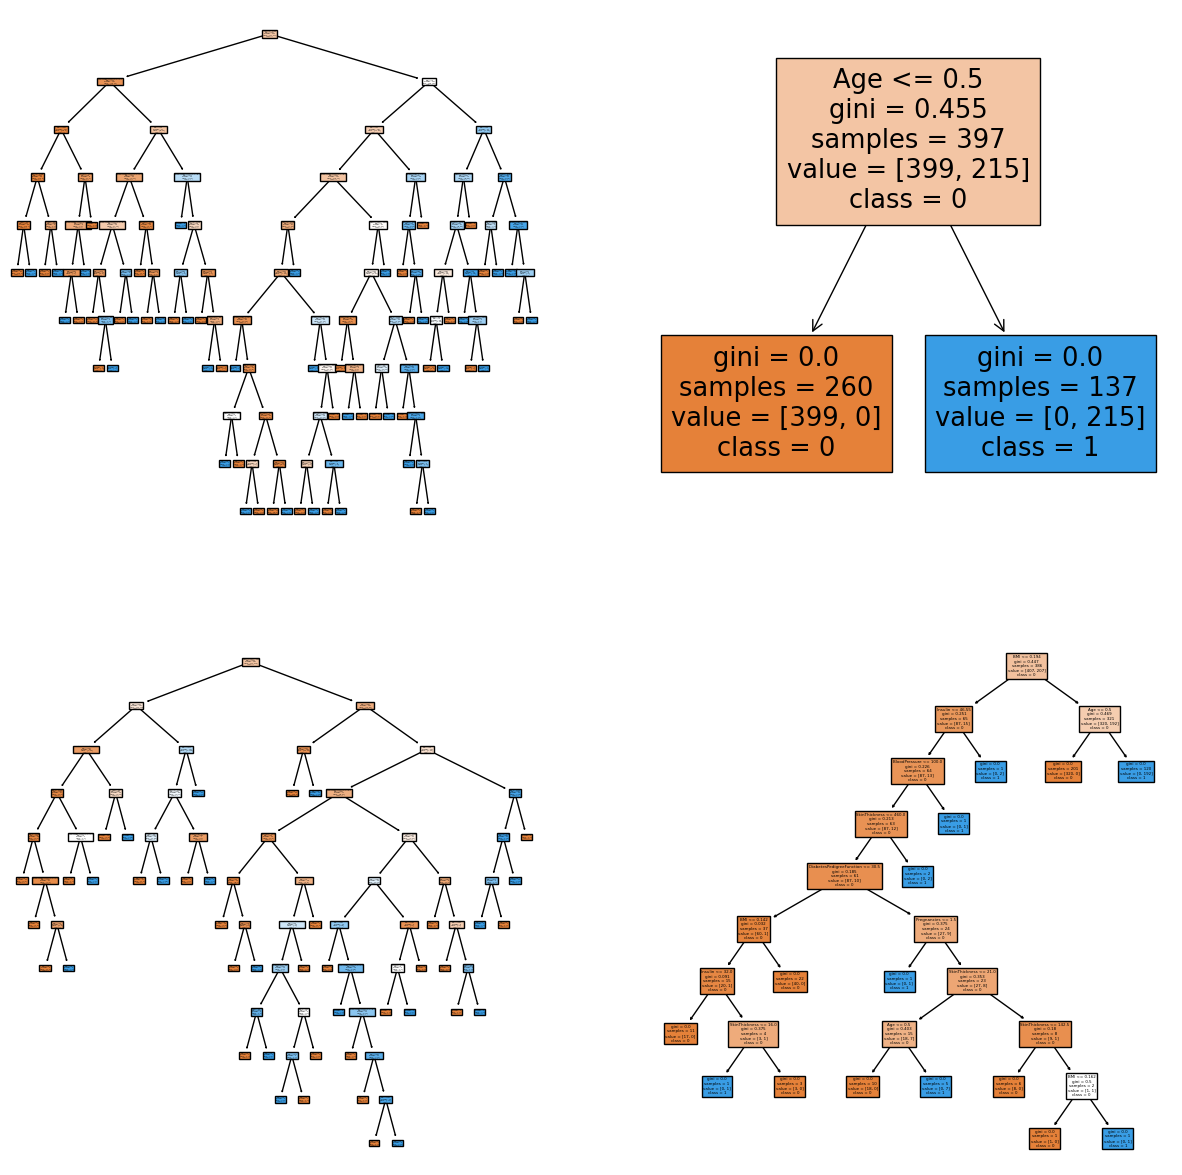

In [16]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [17]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [18]:
accuracy_score(y_test, y_pred)

1.0

In [19]:
# El modelo tiene precisión perfecta. Se realiza hiperparametrización como parte de la tarea solamente.

In [20]:
dump(model, open("../models/random_forest_regressor_default_2020.sav", "wb"))

In [21]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=60,
                                              random_state=2020),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [22]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
model = RandomForestClassifier(n_estimators=80, criterion = "entropy", max_depth = None, min_samples_leaf = 4, min_samples_split = 2, random_state = 2020)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=4, n_estimators=80,
                       random_state=2020)

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [28]:
accuracy_score(y_test, y_pred)

0.7597402597402597

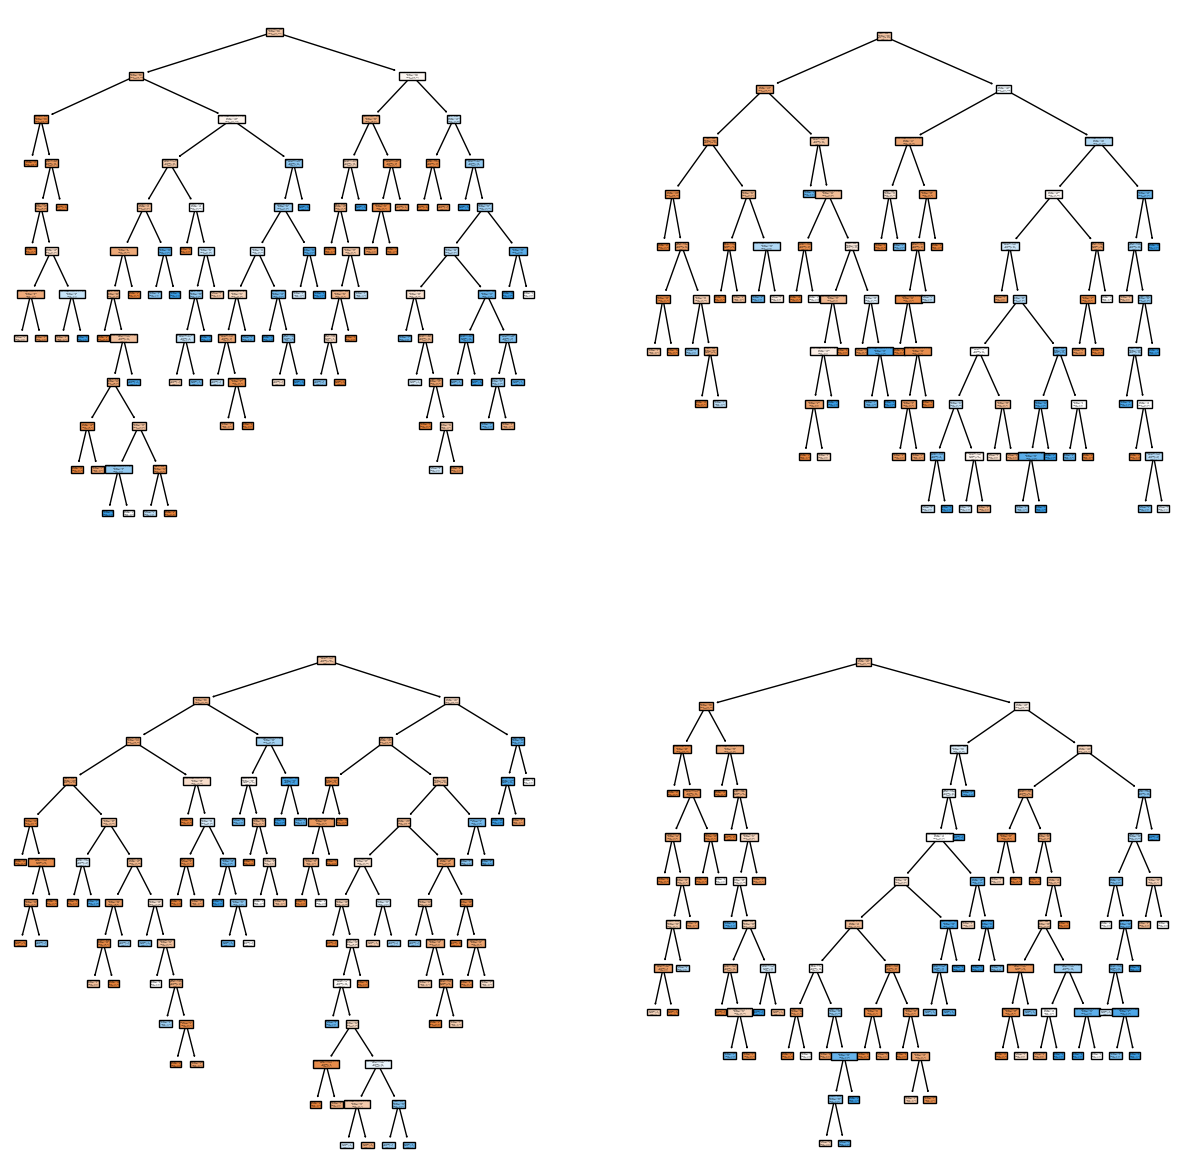

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [33]:
# Los hiperparametrización reduce la precisión de los resultados